# Machine Learning with Scikit-learn on the "Titanic: Machine Learning from Disaster" challenge dataset

This notebook shows how to learn statistical models for predicting the survival rate of the passengers in the Titanic cruise ship. The dataset's statistical analysis and visualization is in a separate notebook named **"Data Analysis and Visualizations.ipynb"** found in the same directory as this one. Here we'll only tackle the use of Python's machine learning library **scikit-learn** for learning a model to predict if a passengers survived of nor the shipwreck.

We'll use several popular methods for statistical learning for modeling our data, such as:

  - Logistic Regression
  - Decision Trees
  - Random Forests
  - SVM
  - Adaptive Boosting
  - Gradient Boosting
  - Neural networks
  - K Nearest Neighbours

Then, we'll combine all models and create an ensemble of models to predict the survival label on a test set.

This notebook is structured as follow:

  1. **Load data**
  
      1.1. Import libraries

      1.2. Load preprocessed files
      
      1.3. Set training and testing data 

  2. **Model selection, training and evaluation**
  
      2.1. Import models from scikit-learn
      
      2.2. Setup models' parameters
      
      2.3. Train the models
      
      2.4. Analyse the models accuracy
      
      2.5. (optional): plot the best features of all models for visual analysis

  3. **Model ensemble**
  
      3.1. Create an ensemble of models
  
  4. **Model prediction**
      
      4.1. Predict and Submit results

## 1. Load data

### 1.1. Import libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting styles
%matplotlib inline
sns.set_style('whitegrid')

### 1.2 Load preprocessed files

The data files used in this notebook have been previously processed. To obtain this data, please run the **Data Analysis and Visualizations.ipynb** notebook before proceeding any further.

In [2]:
# Load pre-processed train and test data sets
train_df = pd.read_csv("data/train_processed.csv")
test_df = pd.read_csv("data/test_processed.csv")

In [3]:
# Display train set feature columns
train_df.columns

Index(['Unnamed: 0', 'Age', 'Fare', 'Name', 'Parch', 'PassengerId', 'SibSp',
       'Survived', 'Family_size', 'Ticket_A', 'Ticket_A4', 'Ticket_A5',
       'Ticket_AQ3', 'Ticket_AQ4', 'Ticket_AS', 'Ticket_C', 'Ticket_CA',
       'Ticket_CASOTON', 'Ticket_FC', 'Ticket_FCC', 'Ticket_Fa', 'Ticket_LINE',
       'Ticket_LP', 'Ticket_PC', 'Ticket_PP', 'Ticket_PPP', 'Ticket_SC',
       'Ticket_SCA3', 'Ticket_SCA4', 'Ticket_SCAH', 'Ticket_SCOW',
       'Ticket_SCPARIS', 'Ticket_SCParis', 'Ticket_SOC', 'Ticket_SOP',
       'Ticket_SOPP', 'Ticket_SOTONO2', 'Ticket_SOTONOQ', 'Ticket_SP',
       'Ticket_STONO', 'Ticket_STONO2', 'Ticket_STONOQ', 'Ticket_SWPP',
       'Ticket_WC', 'Ticket_WEP', 'Ticket_digits', 'Fsize_Large',
       'Fsize_Medium', 'Fsize_Single', 'Fsize_Small', 'Title_Captain',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Other', 'Cabin_A',
       'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G',
       'Cabin_T', 'Cabin_X', 'E_C', 'E_Q', 'E_S', 'Sex_fema

In [4]:
# Display test set feature columns
test_df.columns

Index(['Unnamed: 0', 'Age', 'Fare', 'Name', 'Parch', 'PassengerId', 'SibSp',
       'Survived', 'Family_size', 'Ticket_A', 'Ticket_A4', 'Ticket_A5',
       'Ticket_AQ3', 'Ticket_AQ4', 'Ticket_AS', 'Ticket_C', 'Ticket_CA',
       'Ticket_CASOTON', 'Ticket_FC', 'Ticket_FCC', 'Ticket_Fa', 'Ticket_LINE',
       'Ticket_LP', 'Ticket_PC', 'Ticket_PP', 'Ticket_PPP', 'Ticket_SC',
       'Ticket_SCA3', 'Ticket_SCA4', 'Ticket_SCAH', 'Ticket_SCOW',
       'Ticket_SCPARIS', 'Ticket_SCParis', 'Ticket_SOC', 'Ticket_SOP',
       'Ticket_SOPP', 'Ticket_SOTONO2', 'Ticket_SOTONOQ', 'Ticket_SP',
       'Ticket_STONO', 'Ticket_STONO2', 'Ticket_STONOQ', 'Ticket_SWPP',
       'Ticket_WC', 'Ticket_WEP', 'Ticket_digits', 'Fsize_Large',
       'Fsize_Medium', 'Fsize_Single', 'Fsize_Small', 'Title_Captain',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Other', 'Cabin_A',
       'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G',
       'Cabin_T', 'Cabin_X', 'E_C', 'E_Q', 'E_S', 'Sex_fema

### 1.3 Set training and testing data

To serve data to a learning algorithm from the scikit-learn library, we need to split the feature columns from the label column.

In [5]:
# Set the features and label variables for use for training a model
X_train = train_df.drop(['Name', 'Family_size', 'PassengerId','Survived', 'Unnamed: 0'], axis=1)
y_train = train_df['Survived']

In [6]:
# Set the features for predicting labels for the test set and upload it to kaggle
X_test = test_df.drop(['Name', 'Family_size', 'PassengerId','Survived', 'Unnamed: 0'], axis=1)

## 2. Model selection, training and evaluation

This section deals with selecting a model for training on a set of data and then evaluating its performance against a set of other models.

We'll use a bunch of popular models from the scikit-learn library for classification. Namely, we'll use:

  - Logistic Regression
  - Decision Trees
  - Random Forests
  - SVM
  - Adaptive Boosting
  - Gradient Boosting
  - Neural networks
  - K Nearest Neighbours

This notebook doesn't focus on evaluating every single model from the scikit-learn library but only the (arguably) most popular models for classification tasks from the scientific community. 

> Note: Any other model that has not been used here can easily be integrated in this notebook with little effort.

### 2.1. Import models from scikit-learn

In [7]:
# Import models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

# Import other tools from scikit-learn
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold

### 2.2. Setup models' parameters

In [8]:
# Random seed for the train procedure
random_seed = 2

In [32]:
# Setup models
classifiers = {
    "Logistic_Regression": {
        "model": LogisticRegression(random_state=random_seed),
        "alias": 'LReg',
        "params": {
            "C": [1, 0.1, 0.01, 0.001, 0.0001],
            "max_iter" : [100, 200],
            "solver": ['lbfgs', 'liblinear']
        }
    },
    "SVC": {
        "model": SVC(random_state=random_seed),
        "alias": 'SVC',
        "params": {
            "C": [1, 0.1, 0.01, 0.001, 0.0001],
            "kernel": ['linear', 'rbf'],
            "decision_function_shape": ['ovr', 'ovo'],
            "probability": [True]
        }
    },
    "Decision_Trees": {
        "model": DecisionTreeClassifier(random_state=random_seed),
        "alias": 'DTree',
        "params": {
            "criterion": ['gini', 'entropy'],
        }
    },
    "Adaboost": {
        "model": AdaBoostClassifier(DecisionTreeClassifier(random_state=random_seed),random_state=random_seed),
        "alias": 'Ada',
        "params": {
            "base_estimator__criterion": ['gini', 'entropy'],
            "base_estimator__splitter": ['best', 'random'],
            "algorithm" : ["SAMME", "SAMME.R"],
            "n_estimators" : [1, 2],
            "learning_rate":  [1, 0.5, 0.3, 0.2, 0.1, 0.01, 0.0001, 0.0001]
        }
    },
    "Gradient_Boosting": {
        "model": GradientBoostingClassifier(random_state=random_seed),
        "alias": 'GBT',
        "params": {
            "loss": ['deviance', 'exponential'],
            "learning_rate": [1, 0.5, 0.3, 0.2, 0.1, 0.01, 0.001, 0.0001],
            "n_estimators": [100, 200, 300, 400, 500],
            "criterion": ["friedman_mse", 'mse'],
            "max_depth": [1,2,3,4,5,6,9],
        }
    },
    "Random_Forest": {
        "model": RandomForestClassifier(random_state=random_seed),
        "alias": "RFT",
        "params": {
            "max_depth": [None],
            "max_features": [1, 3, 10, 'auto'],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "bootstrap": [False],
            "n_estimators" :[100, 300],
            "criterion": ["gini", "entropy"]
        }
    },
    "K_Nearest_Neighbours": {
        "model": KNeighborsClassifier(),
        "alias": 'KNN',
        "params": {
            "n_neighbors": list(range(2,40+1,2)),
            "weights": ['uniform', 'distance']
        }
    },
    "Neural_Network": {
        "model": MLPClassifier(random_state=random_seed),
        "alias": 'NN',
        "params": {
            "hidden_layer_sizes": list(range(100, 200+1, 25)),
            "solver": ['adam', 'lbfgs'],
            "alpha": [0.001, 0.0001, 0.00001],
            "learning_rate": ['constant', 'adaptive'],
            "learning_rate_init": [1, 0.5, 0.2, 0.1, 0.01, 0.001, 0.0001],
            "tol": [1e-3, 1e-4, 1e-5]
        }
    }
}

### 2.3. Train the models

This subsection deals with training classification models on the Titanic train set. The models previously set up will now be fit to the training set of the Titanic dataset.

> Note: To conserve time, you can use a quicker way to tune the models' hyperparameters by using random search instead of using grid search. Set **use_quicker_search=True** to enable this option.

In [10]:
%%time
# Train all models using cross validation and randomized search for hyperparameter tunning

import time

#import warnings
#warnings.filterwarnings('ignore')

# Number of concurrent jobs
n_jobs = 4

# Verbose level
verbose_level = 0

# Hyperparameters estimation: quicker vs thorough search
# If True, uses the random search to fine tune the models (quicker to train).
# Otherwise, uses grid search to find the best parameters (takes longer).
use_quicker_search = False

# Cross validate the models with Kfold stratified cross validation
kfold = StratifiedKFold(n_splits=10)

# Store the train results in a var
results = {}

# Train all models
total_models = len(classifiers)
for i, model_name in enumerate(classifiers):
    start = time.time()
    print('({}/{}) {}: start training model... '.format(i+1, total_models, model_name), end="", flush=True)
    
    # Fetch the model to train
    clf = classifiers[model_name]['model']
    
    # Fetch the model parameters
    params = classifiers[model_name]['params']
    
    # Train the model
    if use_quicker_search:
        random_search = RandomizedSearchCV(clf, param_distributions=params, cv=kfold, n_iter=5, scoring='accuracy', n_jobs=n_jobs, verbose=verbose_level)
        random_search.fit(X_train, y_train)
        results[model_name] = random_search
    else:
        grid_search = GridSearchCV(clf, param_grid=params, cv=kfold, scoring='accuracy', n_jobs=n_jobs, verbose=verbose_level)
        grid_search.fit(X_train, y_train)
        results[model_name] = grid_search
    
    print('Done! Elapsed time: {}s\n'.format(time.time() - start))

(1/8) Logistic_Regression: start training model... Done! Elapsed time: 4.03299617767334s

(2/8) SVC: start training model... Done! Elapsed time: 29.99802017211914s

(3/8) Decision_Trees: start training model... Done! Elapsed time: 0.1690843105316162s

(4/8) Adaboost: start training model... Done! Elapsed time: 3.472778558731079s

(5/8) Gradient_Boosting: start training model... Done! Elapsed time: 2124.3439662456512s

(6/8) Random_Forest: start training model... Done! Elapsed time: 138.07319903373718s

(7/8) K_Nearest_Neighbours: start training model... Done! Elapsed time: 2.967323064804077s

(8/8) Neural_Network: start training model... Done! Elapsed time: 18021.370620965958s

CPU times: user 1min 28s, sys: 8.52 s, total: 1min 37s
Wall time: 5h 38min 44s


### 2.4 Analyse the models accuracy

In [106]:
results['Neural_Network'].best_params_

{'alpha': 1e-05,
 'hidden_layer_sizes': 150,
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'solver': 'adam',
 'tol': 0.001}

In [75]:
# Compute the mean + std for all models
results_mean_std = []
for model_name in results:
    # Get the model random/grid search results
    results_model = results[model_name]
    
    # Get the best score
    score = results_model.grid_scores_[results_model.best_index_]
    
    # Compute mean + std and add it to a list
    results_mean_std.append({
        "model": model_name,
        "mean": np.mean(score.cv_validation_scores),
        "std": np.std(score.cv_validation_scores)
    })

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribut

In [76]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])

In [77]:
# Show the accuracy dataframe
accuracy_df

,model,mean,std
0,Logistic_Regression,0.828323,0.026341
1,SVC,0.828273,0.025684
2,Decision_Trees,0.809284,0.042931
3,Adaboost,0.822768,0.044098
4,Gradient_Boosting,0.849635,0.041024
5,Random_Forest,0.835028,0.031720
6,K_Nearest_Neighbours,0.814903,0.028863
7,Neural_Network,0.826113,0.028892


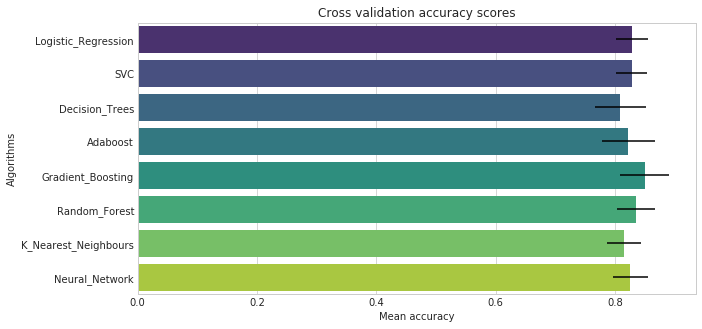

In [83]:
# Plot the mean accuracy for all models
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
g = sns.barplot(data=accuracy_df, y='model', x='mean', orient='h', **{'xerr':accuracy_df['std']}, palette='viridis', ax=ax)
g.set_ylabel('Algorithms')
g.set_xlabel('Mean accuracy')
g.set_title('Cross validation accuracy scores')

Here we have the result of the accuracy of all models trained. From these, the model with the best accuracy was the **Random_Forest** model with 83.16% accuracy with 3.05% standard deviation. In the next section, we'll use an ensemble of all trained models to get a few extra % on the final model accuracy. This is common practice since it gives an extra boost in accuracy by using the models trained when analysing their accuracy.

For now, lets check and see how each model is correlated with the others by predicting labels for the test set and comparing their correlation scores.

In [15]:
# Create a prediction of all models on the test set
predictions_all = {}
for model_name in results:
    # Get best estimator
    best_model = results[model_name].best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_test)
    
    # Save predictions to a list
    predictions_all[model_name] = predictions

In [16]:
# Creat a DataFrame for the predictions
pred = pd.DataFrame(predictions_all)

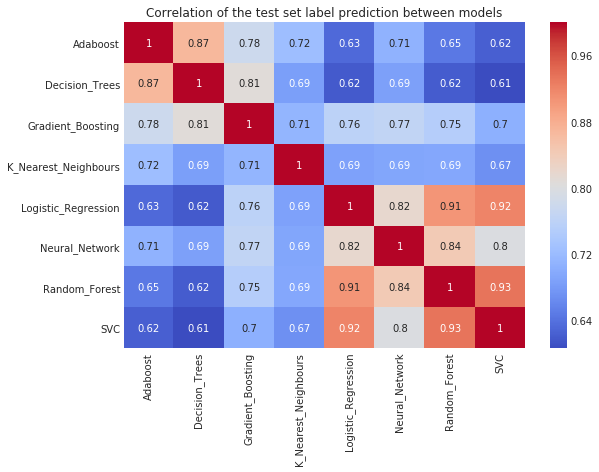

In [101]:
# Plot a heatmap of all correlations for easier visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

We see that the models are all correlated in some way. Them not being fully correlated assures us that we can probably gain some extra performance by using an ensemble of the responses of each model to produce a final prediction.

### 2.5. (optional): plot the best features of all models for visual analysis

In this subsection, the feature importance is plotted for all models in order to visually see which features were more important for each model 

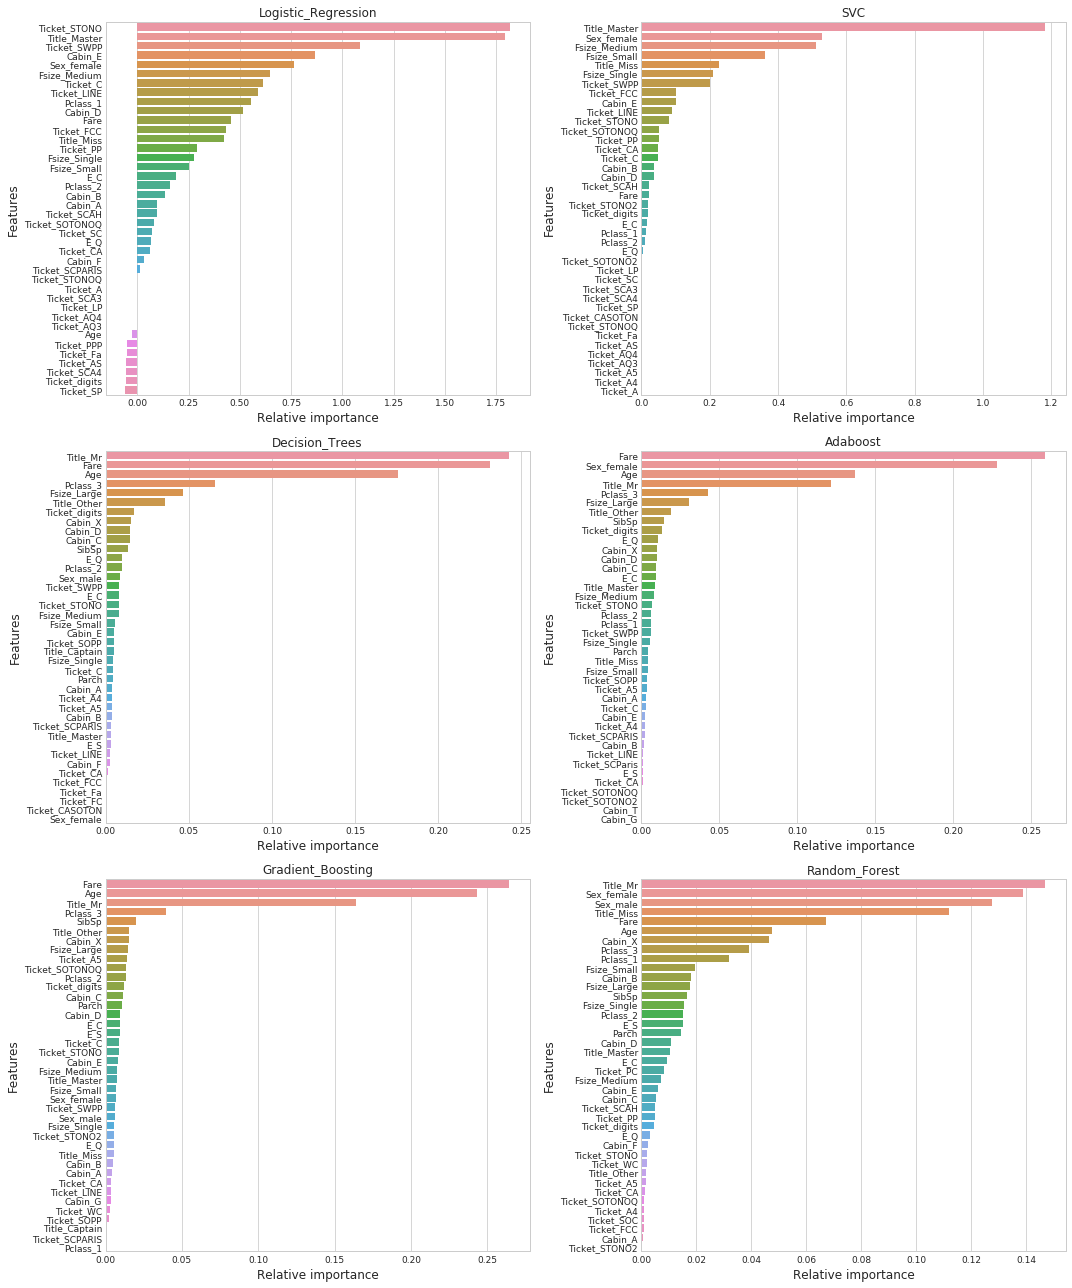

In [74]:
import math

# Create figure
total_models = len(results) - 2  # no features to show for KNN and NN
ncols = 2
nrows = math.ceil(total_models / ncols)
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(15,18))

# get a list of flat axes
if type(axes[0]) == np.ndarray:
    flat_axes = [ax for axes_ in axes for ax in axes_]
else:
    flat_axes = [ax for ax in axes]

# Get model names 
model_names = list(results.keys())

# Get feature names
feature_names = X_train.columns

# Cycle all models and plot them
for i, model_name in enumerate(results):
    if not model_name in ['K_Nearest_Neighbours', 'Neural_Network']:
        # Model estimator
        model = results[model_name].best_estimator_

        # Get the top 40 features
        try:
            indices = np.argsort(model.feature_importances_)[::-1][:40]
            feats = model.feature_importances_[indices][:40]
        except AttributeError:
            indices = np.argsort(model.coef_[0])[::-1][:40]
            feats = model.coef_[0][indices][:40]

        # Plot the features sorted by their importance
        g = sns.barplot(y=X_train.columns[indices][:40], x = feats, orient='h', ax=flat_axes[i])
        g.set_xlabel("Relative importance", fontsize=12)
        g.set_ylabel("Features", fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(model_name)
plt.tight_layout()

Here we have a list of the top-40 features for all algorithms. We can see that all have different selections of features and different importance levels for each. However, some top-performing fields are common to all like the gender of a passenger.

## 3. Model ensemble

This section deals with creating an ensemble of models for predicting the correct label for classifation of passenger survival.

### 3.1. Create an ensemble of models

In [19]:
# Import ensemble model
from sklearn.ensemble import VotingClassifier

In [90]:
# Create a list with the top-5 estimators for the model ensemble
estimators = []
for model_name in results:
    if model_name in ['Gradient_Boosting', 'Random_Forest', 'Logistic_Regression', 'SVC', 'Neural_Network']:
        best_model = results[model_name].best_estimator_
        alias = classifiers[model_name]['alias']
        estimators.append((alias, best_model))

In [92]:
# Train the ensemble of models
votingC = VotingClassifier(estimators=estimators, voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, y_train)

## 4. Model prediction

### 4.1. Predict and Submit results

In [98]:
# Compute predictions and save it into a Pandas Series
test_predictions = pd.Series(votingC.predict(X_test), name="Survived").astype(int)

# Combine the passenger ID with the Survived labels
test_results = pd.concat([test_df['PassengerId'], test_predictions], axis=1)

# Export predictions
test_results.to_csv("data/ensemble_python_voting_gradient_boosting.csv", index=False)